# Part_1

## 1.Importing the technologies

In [1]:
import pandas as pd 
import numpy as np 
import scipy 
import matplotlib.pyplot as plt 
import tensorflow as tf

2025-10-23 18:07:40.403232: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-23 18:07:40.921058: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-23 18:07:40.921208: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-23 18:07:41.011954: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-23 18:07:41.206809: I tensorflow/core/platform/cpu_feature_guar

## 2.Getting the dataset

In [2]:
train_data= pd.read_csv(filepath_or_buffer="/home/tarefbilel/IA/Deep_Learning/NLP/part_1/nlp_getting_started/train.csv")
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [3]:
test_data= pd.read_csv("/home/tarefbilel/IA/Deep_Learning/NLP/part_1/nlp_getting_started/test.csv")
test_data

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


## 3.Exploratory data analysis

In [4]:
len(train_data), len(test_data)

(7613, 3263)

Text(0.5, 0, 'Disaster')

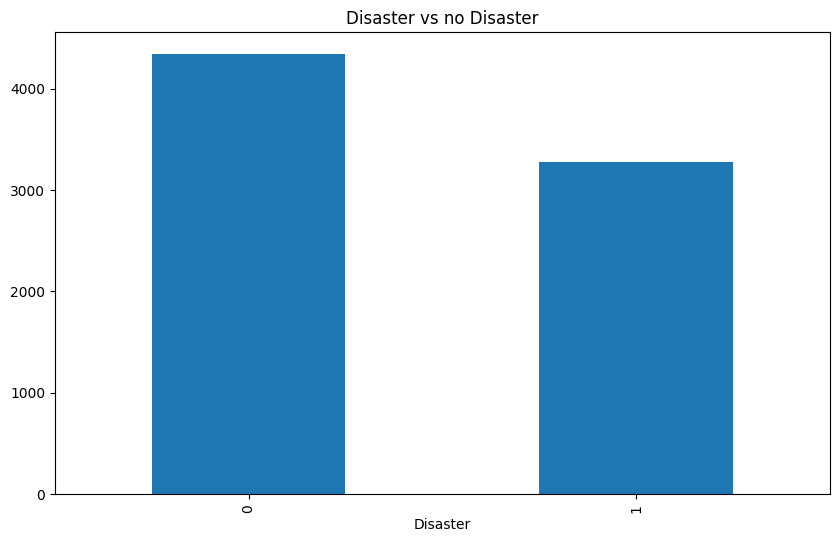

In [5]:
plt.figure(figsize=(10,6))
plt.title("Disaster vs no Disaster")
train_data["target"].value_counts().plot.bar().set_xlabel("Disaster")

In [6]:
import random 
random_index= random.randint(1, len(train_data)-5)

for row in train_data[["text","target"]][random_index:random_index+5].itertuples():
 _,text, target= row 
 print(f"Target: {target}","(real disaster)" if target>0 else "(no disaster)")
 print(f"Text:\n{text}\n")
 print("----\n")

Target: 0 (no disaster)
Text:
5000 year old ring fort to be demolished http://t.co/1PxpoqKTjo

----

Target: 0 (no disaster)
Text:
@JackMulholland1 I think also became THE MARQUIS! Then Carlos &amp; Charlie's and finally Dublin's. Sadly demolished.

----

Target: 1 (real disaster)
Text:
A demolished Palestinian village comes back to life http://t.co/9Lpf4V4hMq

----

Target: 1 (real disaster)
Text:
Three Homes Demolished in Unrecognized Arab Village - International Middle East Media Center http://t.co/ik8m4Yi9T4

----

Target: 1 (real disaster)
Text:
EPA begins demolition of homes in toxic area #Buffalo - http://t.co/noRkXBRS6G

----



## 4.Splitting the data

In [7]:
from sklearn.model_selection import train_test_split 

train_sentences,val_sentences,train_labels,val_labels= train_test_split(train_data["text"].to_numpy(),
                                                                        train_data["target"].to_numpy(),
                                                                        test_size=0.2,
                                                                        random_state=42)

In [8]:
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6090, 1523, 6090, 1523)

## 5.Text vectorization

In [9]:
text_vector= tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=None,
                                                                          standardize= 'lower_and_strip_punctuation',
                                                                          split="whitespace",
                                                                          ngrams=None,
                                                                          output_mode="int",
                                                                          output_sequence_length=None
                                                                          )

2025-10-23 18:07:49.241250: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-10-23 18:07:49.471019: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-10-23 18:07:49.471083: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-10-23 18:07:49.474026: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-10-23 18:07:49.474064: I external/local_xla/xla/stream_executor

In [10]:
max_vocab_length=10000
max_length=15

text_vector= tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=max_vocab_length,
                                                                          output_mode="int",
                                                                          output_sequence_length=max_length)

In [11]:
text_vector.adapt(train_sentences)

In [12]:
try_sent= "Hello world i'm learning tensorflow"
text_vector([try_sent])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1700,  103,   32, 2209,    1,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [13]:
ran_sent= random.choice(train_sentences)
print(f"The random sentence is {ran_sent}")
text_vector([ran_sent])

The random sentence is [Report 5] 18:22:45 Ibaraki Prefecture offing M5.5 Depth 60km Maximum seismic intensity 4 #Earthquake


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 288,  181,    1,    1, 8836, 9402,    1, 2292,    1, 1891,  501,
        1916,  199,  235,    0]])>

## 6.Embedding layers

In [14]:
embedding= tf.keras.layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     input_length=max_length)

In [15]:
ran_sent= random.choice(train_sentences)
print(f"The original sentence is: {ran_sent}\n")
sample_embedding= embedding(text_vector([ran_sent]))

print(f"\nThe embedded version is:{sample_embedding}")

The original sentence is: Correction: Tent Collapse Story http://t.co/S7VYGeNJuv


The embedded version is:[[[-0.04294036 -0.00557334  0.00189782 ... -0.04769819 -0.02359482
   -0.02456566]
  [-0.04619424  0.03756007  0.01961787 ... -0.03147153  0.02393998
   -0.03777998]
  [-0.00846112 -0.03766292 -0.00593592 ...  0.04143118 -0.019048
    0.04411924]
  ...
  [-0.03507444  0.00875511  0.00832202 ... -0.02574359  0.04003035
    0.01885525]
  [-0.03507444  0.00875511  0.00832202 ... -0.02574359  0.04003035
    0.01885525]
  [-0.03507444  0.00875511  0.00832202 ... -0.02574359  0.04003035
    0.01885525]]]


In [16]:
round(sum(len(i.split()) for i in train_sentences) / len(train_sentences))


15

## 7.Model_0

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import Pipeline

model_0= Pipeline([
    ("tf-idf",TfidfVectorizer()),
    ("clf",MultinomialNB())
])

model_0.fit(train_sentences,train_labels)

,steps,"[('tf-idf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [18]:
model_0_eval= model_0.score(val_sentences,val_labels)

print(f"Our baseline model achieve {model_0_eval*100:.2f}% accuracy")

Our baseline model achieve 79.97% accuracy


In [19]:
model_0_pred= model_0.predict(val_sentences)
model_0_pred

array([0, 0, 0, ..., 1, 1, 0])

In [20]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

In [21]:
def evaluation(y_true,y_pred):
    model_results={
        'accuracy': accuracy_score(y_true,y_pred)*100,
        'Recall': recall_score(y_true,y_pred)*100,
        'Precision': precision_score(y_true,y_pred)*100,
        'f1_score': f1_score(y_true,y_pred)*100
    }
    return model_results

In [22]:
model_0_results= evaluation(val_labels,model_0_pred)

In [23]:
model_0_results

{'accuracy': 79.97373604727511,
 'Recall': 63.02003081664098,
 'Precision': 86.28691983122363,
 'f1_score': 72.84060552092609}

In [24]:
model_0_results_df= pd.DataFrame(model_0_results,index=["Score"])
model_0_results_df

,accuracy,Recall,Precision,f1_score
Score,79.973736,63.020031,86.28692,72.840606


## 8.Model_1

In [25]:
inputs= tf.keras.layers.Input(shape=(1,),dtype="string")
x= text_vector(inputs)
x= embedding(x)
x= tf.keras.layers.GlobalAveragePooling1D()(x)
outputs= tf.keras.layers.Dense(1,activation="sigmoid")(x)

model_1= tf.keras.Model(inputs,outputs)

In [26]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 1280129 (4.

In [27]:
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [28]:
model_1_history= model_1.fit(train_sentences,
                             train_labels,
                             epochs=10,
                             validation_data=(val_sentences,val_labels)
                             )

Epoch 1/10


2025-10-23 18:07:54.483352: I external/local_xla/xla/service/service.cc:168] XLA service 0x72f81cffdda0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-23 18:07:54.483413: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-10-23 18:07:54.509681: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-23 18:07:54.599712: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1761235674.655628    1207 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


191/191 [==============================] - 7s 25ms/step - loss: 0.6223 - accuracy: 0.6842 - val_loss: 0.5439 - val_accuracy: 0.7800
Epoch 2/10
191/191 [==============================] - 2s 11ms/step - loss: 0.4561 - accuracy: 0.8090 - val_loss: 0.4653 - val_accuracy: 0.8024
Epoch 3/10
191/191 [==============================] - 2s 13ms/step - loss: 0.3565 - accuracy: 0.8583 - val_loss: 0.4446 - val_accuracy: 0.8096
Epoch 4/10
191/191 [==============================] - 2s 11ms/step - loss: 0.2901 - accuracy: 0.8901 - val_loss: 0.4446 - val_accuracy: 0.8043
Epoch 5/10
191/191 [==============================] - 2s 9ms/step - loss: 0.2404 - accuracy: 0.9112 - val_loss: 0.4555 - val_accuracy: 0.7991
Epoch 6/10
191/191 [==============================] - 2s 10ms/step - loss: 0.2017 - accuracy: 0.9268 - val_loss: 0.4751 - val_accuracy: 0.7991
Epoch 7/10
191/191 [==============================] - 2s 11ms/step - loss: 0.1710 - accuracy: 0.9422 - val_loss: 0.4934 - val_accuracy: 0.7886
Epoch 8/10


In [29]:
model_1.evaluate(val_sentences,val_labels)

48/48 [==============================] - 0s 3ms/step - loss: 0.5706 - accuracy: 0.7768


[0.5706291198730469, 0.7767564058303833]

In [30]:
model_1_pred_prob= model_1.predict(val_sentences)
model_1_pred_prob.shape

48/48 [==============================] - 0s 2ms/step


(1523, 1)

In [31]:
model_1_pred_prob[0]

array([0.01234195], dtype=float32)

In [32]:
model_1_pred= tf.squeeze(tf.round(model_1_pred_prob))

In [33]:
model_1_pred

<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)>

In [34]:
model_1_results= evaluation(y_true=val_labels,y_pred=model_1_pred)

In [35]:
model_1_results, model_0_results

({'accuracy': 77.67564018384768,
  'Recall': 72.72727272727273,
  'Precision': 74.33070866141732,
  'f1_score': 73.5202492211838},
 {'accuracy': 79.97373604727511,
  'Recall': 63.02003081664098,
  'Precision': 86.28691983122363,
  'f1_score': 72.84060552092609})

### 8.1 Visualizing Embedding

In [36]:
words_in_vocab= text_vector.get_vocabulary()

len(words_in_vocab)

10000

In [37]:
print(words_in_vocab)

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'i', 'and', 'is', 'for', 'on', 'you', 'my', 'with', 'that', 'it', 'at', 'by', 'this', 'from', 'be', 'are', 'have', 'was', 'like', 'but', 'as', 'up', 'so', 'me', 'just', 'im', 'amp', 'not', 'your', 'out', 'no', 'after', 'its', 'has', 'all', 'will', 'when', 'an', 'fire', 'if', 'we', 'get', 'more', 'now', 'via', 'new', 'about', 'people', 'what', 'news', 'or', 'been', 'over', 'he', 'dont', 'how', 'they', 'one', 'who', 'were', 'video', 'into', 'us', 'can', '2', 'do', 'emergency', 'disaster', 'there', 'her', 'than', 'would', 'some', 'still', 'his', 'body', 'police', 'california', 'time', 'suicide', 'burning', 'back', 'had', 'buildings', 'off', 'got', 'crash', 'day', 'why', 'man', 'them', 'see', 'know', 'first', 'cant', 'storm', 'world', 'two', 'youtube', 'nuclear', 'attack', 'their', 'going', 'fires', '3', 'train', 'rt', 'killed', 'go', 'life', 'car', 'bomb', 'our', 'may', 'love', 'full', 'watch', 'war', 'hiroshima', 'today', 'only', 'good', 'dead'

In [38]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 1280129 (4.

In [39]:
embedd_weight=  model_1.get_layer(name="embedding").get_weights()
embedd_weight

[array([[-2.5588639e-02,  2.5757426e-02,  2.3423430e-02, ...,
         -1.2008281e-02,  5.5294182e-02,  3.7241024e-03],
        [ 2.8197443e-02,  3.7156951e-02,  3.0703636e-02, ...,
         -3.5026103e-02,  3.8006718e-03,  4.1384339e-02],
        [ 6.6355229e-03, -2.2978958e-02,  1.8919792e-02, ...,
          5.0525386e-02,  4.5429852e-02,  1.3765154e-04],
        ...,
        [ 7.8722298e-02,  8.3733000e-02,  1.4742428e-01, ...,
          1.4671372e-01,  1.3907748e-01, -1.4890866e-01],
        [ 4.5312569e-02,  9.1627324e-03,  6.4160973e-02, ...,
          3.8429823e-02,  2.4257505e-02, -7.5160474e-02],
        [ 1.5938389e-01,  9.4948411e-02,  1.1172681e-01, ...,
          1.4773796e-01,  1.2160213e-01, -1.5422644e-01]], dtype=float32)]

In [40]:
# we got this from docs
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0 or index >= len(embedd_weight):
    continue  # skip 0, it's padding.
  vec = embedd_weight[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

# Part_2:RNN

In [41]:
train_sentences[:10]

array(['Courageous and honest analysis of need to use Atomic Bomb in 1945. #Hiroshima70 Japanese military refused surrender. https://t.co/VhmtyTptGR',
       '@ZachZaidman @670TheScore wld b a shame if that golf cart became engulfed in flames. #boycottBears',
       "Tell @BarackObama to rescind medals of 'honor' given to US soldiers at the Massacre of Wounded Knee. SIGN NOW &amp; RT! https://t.co/u4r8dRiuAc",
       'Worried about how the CA drought might affect you? Extreme Weather: Does it Dampen Our Economy? http://t.co/fDzzuMyW8i',
       '@YoungHeroesID Lava Blast &amp; Power Red #PantherAttack @JamilAzzaini @alifaditha',
       "Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/yi54XRHQGB",
       'Our builder is having a dental emergency. Which has ruined my plan to emotionally blackmail him this afternoon with my bump.',
       'BMX issues Areal Flood Advisory for Shelby [AL] till Aug 5 9:00 PM CDT htt

## Model_2:LSTM

In [42]:
inputs= tf.keras.layers.Input(shape=(1,),dtype=tf.string)

x= text_vector(inputs)
x= embedding(x)
print(x.shape)
x= tf.keras.layers.LSTM(units=64,return_sequences=True)(x)
print(x.shape)
x=tf.keras.layers.LSTM(units=64)(x)
print(x.shape)
x=tf.keras.layers.Dense(64,activation="relu")(x)
print(x.shape)
outputs= tf.keras.layers.Dense(1,activation="sigmoid")(x)

model_2= tf.keras.Model(inputs,outputs)

(None, 15, 128)
(None, 15, 64)
(None, 64)
(None, 64)


In [43]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                           

In [44]:
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [45]:
model_2_history=model_2.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels))

Epoch 1/5
191/191 [==============================] - 12s 45ms/step - loss: 0.1398 - accuracy: 0.9596 - val_loss: 0.7204 - val_accuracy: 0.7748
Epoch 2/5
191/191 [==============================] - 4s 20ms/step - loss: 0.0796 - accuracy: 0.9711 - val_loss: 0.8811 - val_accuracy: 0.7695
Epoch 3/5
191/191 [==============================] - 3s 16ms/step - loss: 0.0680 - accuracy: 0.9737 - val_loss: 1.3178 - val_accuracy: 0.7722
Epoch 4/5
191/191 [==============================] - 3s 14ms/step - loss: 0.0592 - accuracy: 0.9759 - val_loss: 1.2055 - val_accuracy: 0.7715
Epoch 5/5
191/191 [==============================] - 2s 12ms/step - loss: 0.0493 - accuracy: 0.9778 - val_loss: 1.1957 - val_accuracy: 0.7708


In [46]:
model_2_pred_prob= model_2.predict(val_sentences)
model_2_pred_prob

48/48 [==============================] - 1s 5ms/step


array([[8.4500884e-05],
       [3.6397993e-03],
       [1.4996160e-04],
       ...,
       [9.9985802e-01],
       [9.9999404e-01],
       [9.9982113e-01]], dtype=float32)

In [47]:
model_2_pred= tf.squeeze(tf.round(model_2_pred_prob))
model_2_pred

<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)>

In [48]:
model_2_results= evaluation(val_labels,model_2_pred)
model_2_results

{'accuracy': 77.08470124753775,
 'Recall': 69.02927580893683,
 'Precision': 75.16778523489933,
 'f1_score': 71.96787148594377}

## Model 3:GRU

In [49]:
inputs= tf.keras.layers.Input(shape=(1,),dtype=tf.string)
x= text_vector(inputs)
x=embedding(x)
print(x.shape)
x=tf.keras.layers.GRU(64,return_sequences=True)(x)
print(x.shape)
x=tf.keras.layers.LSTM(64,return_sequences=True)(x)
print(x.shape)
x=tf.keras.layers.GRU(64)(x)
print(x.shape)
x=tf.keras.layers.Dense(64,activation="relu")(x)
print(x.shape)
outputs= tf.keras.layers.Dense(1,activation="sigmoid")(x)
print(outputs.shape)
model_3=tf.keras.Model(inputs,outputs)

(None, 15, 128)
(None, 15, 64)
(None, 15, 64)
(None, 64)
(None, 64)
(None, 1)


In [50]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 lstm_2 (LSTM)               (None, 15, 64)            33024     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                           

In [51]:
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [52]:
model_3_history=model_3.fit(train_sentences,
                train_labels,
                epochs=5,
                validation_data=(val_sentences,val_labels))

Epoch 1/5
191/191 [==============================] - 13s 53ms/step - loss: 0.1111 - accuracy: 0.9681 - val_loss: 0.7974 - val_accuracy: 0.7761
Epoch 2/5
191/191 [==============================] - 4s 22ms/step - loss: 0.0529 - accuracy: 0.9772 - val_loss: 1.4801 - val_accuracy: 0.7722
Epoch 3/5
191/191 [==============================] - 3s 16ms/step - loss: 0.0424 - accuracy: 0.9790 - val_loss: 1.3964 - val_accuracy: 0.7669
Epoch 4/5
191/191 [==============================] - 3s 14ms/step - loss: 0.0447 - accuracy: 0.9790 - val_loss: 1.1282 - val_accuracy: 0.7728
Epoch 5/5
191/191 [==============================] - 3s 14ms/step - loss: 0.0403 - accuracy: 0.9805 - val_loss: 1.4988 - val_accuracy: 0.7590


In [53]:
model_3_pred_probs= model_3.predict(val_sentences)
model_3_pred_probs

48/48 [==============================] - 1s 5ms/step


array([[2.57523003e-04],
       [1.42332725e-02],
       [5.90198324e-04],
       ...,
       [9.99891281e-01],
       [9.99985337e-01],
       [9.99929667e-01]], dtype=float32)

In [54]:
model_3_prob=tf.squeeze(tf.round(model_3_pred_probs))
model_3_prob

<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)>

In [55]:
model_3_results= evaluation(val_labels,model_3_prob)
model_3_results 

{'accuracy': 75.90282337491793,
 'Recall': 69.79969183359015,
 'Precision': 72.59615384615384,
 'f1_score': 71.17046347211313}

## Model_4:Biderectional RNN

In [56]:
inputs= tf.keras.layers.Input(shape=(1,),dtype=tf.string)
x= text_vector(inputs)
print(x.shape)
x= embedding(x)
print(x.shape)
x= tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True))(x)
print(x.shape)
x= tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64))(x)
print(x.shape)
x= tf.keras.layers.Dense(20,activation="relu")(x)
print(x.shape)
outputs= tf.keras.layers.Dense(1,activation="sigmoid")(x)
print(x.shape)
model_4= tf.keras.Model(inputs,outputs)


(None, 15)
(None, 15, 128)
(None, 15, 128)
(None, 128)
(None, 20)
(None, 20)


In [57]:
model_4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 15, 128)           98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               74496     
 onal)                                                           
                                                           

In [58]:
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [59]:
model_4_history=model_4.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(val_sentences,val_labels))

Epoch 1/5
191/191 [==============================] - 14s 51ms/step - loss: 0.0897 - accuracy: 0.9783 - val_loss: 0.9459 - val_accuracy: 0.7551
Epoch 2/5
191/191 [==============================] - 5s 27ms/step - loss: 0.0378 - accuracy: 0.9828 - val_loss: 1.4036 - val_accuracy: 0.7590
Epoch 3/5
191/191 [==============================] - 5s 27ms/step - loss: 0.0367 - accuracy: 0.9813 - val_loss: 1.3371 - val_accuracy: 0.7656
Epoch 4/5
191/191 [==============================] - 4s 23ms/step - loss: 0.0346 - accuracy: 0.9826 - val_loss: 1.4291 - val_accuracy: 0.7479
Epoch 5/5
191/191 [==============================] - 4s 20ms/step - loss: 0.0301 - accuracy: 0.9829 - val_loss: 1.8714 - val_accuracy: 0.7321


In [60]:
model_4_pred_probs= model_4.predict(val_sentences)
model_4_pred_probs

48/48 [==============================] - 1s 7ms/step


array([[2.3010178e-04],
       [2.7967993e-02],
       [5.8452878e-04],
       ...,
       [9.9999774e-01],
       [9.9999976e-01],
       [9.9999762e-01]], dtype=float32)

In [61]:
model_4_preds= tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds

<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)>

In [62]:
model_4_results= evaluation(val_labels,model_4_preds)
model_4_results

{'accuracy': 73.21076822061721,
 'Recall': 76.88751926040062,
 'Precision': 65.91809775429326,
 'f1_score': 70.98150782361309}

# Part_3:CNN

## Model_5:Conv_1D

In [63]:
embedding_test= embedding(text_vector(["This is a test"]))
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.05035743,  0.00417555,  0.01219798, ...,  0.08178783,
         -0.00322447, -0.11566475],
        [-0.04329941, -0.01822098, -0.0231241 , ..., -0.05022304,
         -0.08231106,  0.01874523],
        [ 0.02952625,  0.00187535, -0.02033571, ...,  0.03313725,
          0.03029799,  0.00738332],
        ...,
        [-0.00028586,  0.03529742,  0.0087559 , ..., -0.01479512,
          0.03797192, -0.0118505 ],
        [-0.00028586,  0.03529742,  0.0087559 , ..., -0.01479512,
          0.03797192, -0.0118505 ],
        [-0.00028586,  0.03529742,  0.0087559 , ..., -0.01479512,
          0.03797192, -0.0118505 ]]], dtype=float32)>

In [64]:
conv_1d=tf.keras.layers.Conv1D(filters=32,
                              kernel_size=5,
                              padding="valid",
                              activation="relu")
conv_1d_output=conv_1d(embedding_test)
max_1d=tf.keras.layers.GlobalMaxPool1D()
max_1d_output=max_1d(conv_1d_output)
max_1d_output
embedding_test.shape, conv_1d_output.shape, max_1d_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [65]:
inputs= tf.keras.layers.Input(shape=(1,),dtype=tf.string)
x=text_vector(inputs)
print(x.shape)
x=embedding(x)
print(x.shape)
x=tf.keras.layers.Conv1D(filters=32,
                         kernel_size=5,
                         padding="valid",
                         activation="relu")(x)
print(x.shape)
x=tf.keras.layers.MaxPool1D()(x)
print(x.shape)
x=tf.keras.layers.Flatten()(x)
outputs=tf.keras.layers.Dense(1,activation="sigmoid")(x)
print(x.shape)
model_5=tf.keras.Model(inputs,outputs)

(None, 15)
(None, 15, 128)
(None, 11, 32)
(None, 5, 32)
(None, 160)


In [66]:
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [67]:
model_5_history=model_5.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels))

Epoch 1/5
191/191 [==============================] - 9s 40ms/step - loss: 0.1367 - accuracy: 0.9654 - val_loss: 0.8613 - val_accuracy: 0.7584
Epoch 2/5
191/191 [==============================] - 2s 11ms/step - loss: 0.0559 - accuracy: 0.9813 - val_loss: 1.0171 - val_accuracy: 0.7498
Epoch 3/5
191/191 [==============================] - 2s 11ms/step - loss: 0.0482 - accuracy: 0.9798 - val_loss: 1.0950 - val_accuracy: 0.7571
Epoch 4/5
191/191 [==============================] - 2s 11ms/step - loss: 0.0433 - accuracy: 0.9793 - val_loss: 1.1530 - val_accuracy: 0.7525
Epoch 5/5
191/191 [==============================] - 2s 11ms/step - loss: 0.0410 - accuracy: 0.9803 - val_loss: 1.1963 - val_accuracy: 0.7433


In [68]:
model_5.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 max_pooling1d (MaxPooling1  (None, 5, 32)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 160)               0   

In [69]:
model_5_pred_probs=model_5.predict(val_sentences)
model_5_preds=tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds

48/48 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)>

In [70]:
model_5_results= evaluation(y_true=val_labels,y_pred=model_5_preds)
model_5_results

{'accuracy': 74.32698621142481,
 'Recall': 71.80277349768875,
 'Precision': 69.13946587537092,
 'f1_score': 70.44595616024188}

In [71]:
model_0_results

{'accuracy': 79.97373604727511,
 'Recall': 63.02003081664098,
 'Precision': 86.28691983122363,
 'f1_score': 72.84060552092609}

## Model_6:Feature extractor

In [72]:
try_sent

"Hello world i'm learning tensorflow"

In [73]:
import tensorflow_hub as hub
embed= hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples=embed([try_sent,"Using the encoding decoding"])
embed_samples[0]

<tf.Tensor: shape=(512,), dtype=float32, numpy=
array([ 0.0526676 , -0.07983267, -0.04808289, -0.04968553, -0.02285131,
       -0.00851848, -0.06124397,  0.00913366,  0.0761248 ,  0.05972984,
       -0.04826975,  0.06293917,  0.01273022,  0.04652979, -0.03252857,
        0.0813678 , -0.02261703, -0.07429764,  0.00301242, -0.07917796,
        0.0026708 ,  0.04444264,  0.02935469,  0.07654417,  0.01867591,
        0.04519924,  0.01945888, -0.01331209, -0.02712488, -0.0177971 ,
        0.03316693, -0.02206059,  0.02067459, -0.03808486, -0.06155284,
        0.02354705,  0.03581993, -0.02465781,  0.03341494,  0.06852718,
        0.05151652,  0.03587982, -0.04845199, -0.02186912,  0.07807879,
        0.06939395, -0.08054341, -0.03000273,  0.04021874,  0.04709358,
       -0.0697381 , -0.02097083,  0.03069704,  0.01474796, -0.02250617,
       -0.05137443,  0.03953406,  0.06600786,  0.0108242 , -0.00517405,
       -0.06803086,  0.00939196,  0.03991667,  0.04746954, -0.01278851,
       -0.020332

In [74]:
sentence_encoder_layer=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                      input_shape=[],
                                      dtype=tf.string,
                                      trainable=False)

In [75]:
model_6=tf.keras.Sequential([
    sentence_encoder_layer,
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [76]:
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [77]:
model_6_history=model_6.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=[val_sentences,val_labels])

Epoch 1/5
191/191 [==============================] - 7s 31ms/step - loss: 0.4878 - accuracy: 0.7854 - val_loss: 0.4146 - val_accuracy: 0.8162
Epoch 2/5
191/191 [==============================] - 5s 24ms/step - loss: 0.4034 - accuracy: 0.8241 - val_loss: 0.4033 - val_accuracy: 0.8214
Epoch 3/5
191/191 [==============================] - 4s 22ms/step - loss: 0.3787 - accuracy: 0.8365 - val_loss: 0.4043 - val_accuracy: 0.8207
Epoch 4/5
191/191 [==============================] - 4s 23ms/step - loss: 0.3540 - accuracy: 0.8491 - val_loss: 0.4055 - val_accuracy: 0.8267
Epoch 5/5
191/191 [==============================] - 4s 21ms/step - loss: 0.3259 - accuracy: 0.8624 - val_loss: 0.4169 - val_accuracy: 0.8207


In [78]:
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 256839105 (979.76 MB)
Trainable params: 41281 (161.25 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [79]:
model_6_pred_probs=model_6.predict(val_sentences)
model_6_pred_probs

48/48 [==============================] - 1s 18ms/step


array([[0.05987492],
       [0.06600594],
       [0.38325545],
       ...,
       [0.9715441 ],
       [0.9954169 ],
       [0.15147135]], dtype=float32)

In [80]:
model_6_preds=tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds

<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 0., 0., ..., 1., 1., 0.], dtype=float32)>

In [81]:
model_6_results=evaluation(y_true=val_labels,y_pred=model_6_preds)


In [82]:
model_6_results

{'accuracy': 82.07485226526592,
 'Recall': 74.42218798151,
 'Precision': 81.86440677966101,
 'f1_score': 77.96610169491525}

In [83]:
results_dic={'model_0':model_0_results,
             'model_1':model_1_results,
             'model_2':model_2_results,
             'model_3':model_3_results,
             'model_4':model_4_results,
             'model_5':model_5_results,
             'model_6':model_6_results
             }

In [84]:
all_results=pd.DataFrame(results_dic)
all_results= all_results.transpose()

In [85]:
all_results

,accuracy,Recall,Precision,f1_score
model_0,79.973736,63.020031,86.286920,72.840606
model_1,77.675640,72.727273,74.330709,73.520249
model_2,77.084701,69.029276,75.167785,71.967871
model_3,75.902823,69.799692,72.596154,71.170463
model_4,73.210768,76.887519,65.918098,70.981508
model_5,74.326986,71.802773,69.139466,70.445956
model_6,82.074852,74.422188,81.864407,77.966102


In [86]:
all_results

,accuracy,Recall,Precision,f1_score
model_0,79.973736,63.020031,86.286920,72.840606
model_1,77.675640,72.727273,74.330709,73.520249
model_2,77.084701,69.029276,75.167785,71.967871
model_3,75.902823,69.799692,72.596154,71.170463
model_4,73.210768,76.887519,65.918098,70.981508
model_5,74.326986,71.802773,69.139466,70.445956
model_6,82.074852,74.422188,81.864407,77.966102


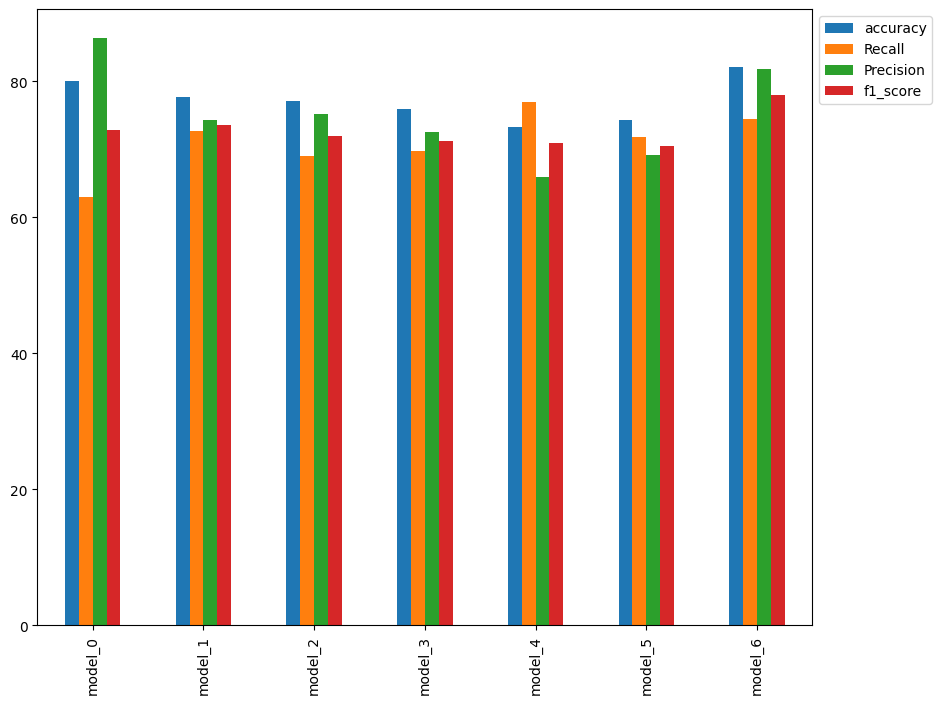

In [87]:

all_results.plot(kind="bar",figsize=(10,8)).legend(bbox_to_anchor=(1.0,1.0))



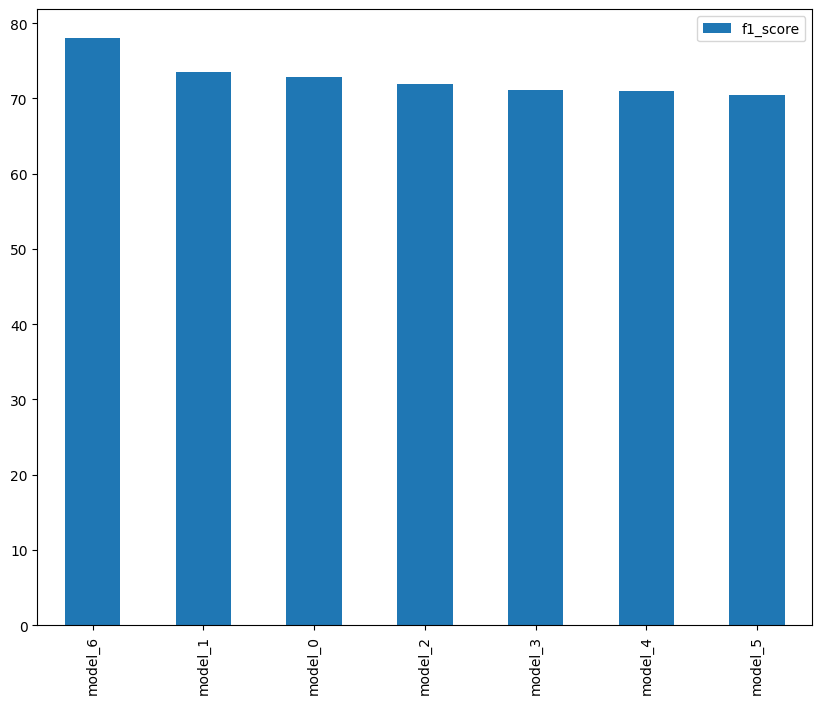

In [88]:
all_results["f1_score"].sort_values(ascending=False).plot(kind="bar",figsize=(10,8)).legend(bbox_to_anchor=(1.0,1.0))

In [89]:
len(train_data)

7613

In [90]:
train_df_10=train_data[["text","target"]].sample(frac=0.1,random_state=42)
train_df_10

,text,target
2644,So you have a new weapon that can cause un-ima...,1
2227,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,Aftershock back to school kick off was great. ...,0
6845,in response to trauma Children of Addicts deve...,0
...,...,...
1153,Today is the day Hiroshima got Atomic bomb 70 ...,1
1034,@Deeeznvtzzz bring the body bags tho,0
3107,Fr cuz I risk being electrocuted every shower ...,0
4379,RT NotExplained: The only known image of infam...,0


In [91]:
model_6.save("/home/tarefbilel/IA/Deep_Learning/NLP/part_1/Models/best_model_6.h5")


/home/tarefbilel/miniconda3/envs/nlp1_env/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [92]:
model_1_pred

<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)>

In [93]:
val_dict={'text': val_sentences,
          'target':val_labels,
          'pred':model_1_pred,
          'pred_prob':tf.squeeze(model_1_pred_prob)
          }

In [94]:
val_res= pd.DataFrame.from_dict(val_dict)
val_res

,text,target,pred,pred_prob
0,So you have a new weapon that can cause un-ima...,1,0.0,0.012342
1,The f$&amp;@ing things I do for #GISHWHES Just...,0,0.0,0.175591
2,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1,0.0,0.134433
3,Aftershock back to school kick off was great. ...,0,0.0,0.010816
4,in response to trauma Children of Addicts deve...,0,1.0,0.804598
...,...,...,...,...
1518,@SmusX16475 Skype just crashed u host,0,0.0,0.312186
1519,Christian Attacked by Muslims at the Temple Mo...,1,1.0,0.999980
1520,Man charged over fatal crash near Dubbo refuse...,1,1.0,0.988137
1521,#usNWSgov Severe Weather Statement issued Augu...,1,1.0,0.999928


In [95]:
most_wrong= val_res[val_res["target"]!=val_res["pred"]].sort_values("pred_prob",ascending=False)
most_wrong

,text,target,pred,pred_prob
574,Mere sight of a gun makes police ÛÒ and publi...,0,1.0,0.998122
261,dogs Lightning reshapes rocks at the atomic le...,0,1.0,0.998031
428,HereÛªs how media in Pakistan covered the cap...,0,1.0,0.997238
347,Survivors of Shanghai Ghetto reunite after 70 ...,0,1.0,0.997048
1336,@KurtSchlichter @FALPhil This liberal compassi...,0,1.0,0.996536
...,...,...,...,...
1463,ItÛªs time to do away with drought.Check out ...,1,0.0,0.001227
1095,STAR WARS POWER OF THE JEDI COLLECTION 1 BATTL...,1,0.0,0.000738
516,Hellfire is surrounded by desires so be carefu...,1,0.0,0.000728
68,Hellfire! We donÛªt even want to think about ...,1,0.0,0.000257


In [96]:
for row in most_wrong[:10].itertuples():
    _, text, target, pred, pred_prob = row
    print(f"Target {target}, Pred {pred}, Prob {pred_prob}")
    print(f"Text: \{text}")
    print("-----\n")

Target 0, Pred 1.0, Prob 0.9981219172477722
Text: \Mere sight of a gun makes police ÛÒ and public ÛÒ more aggressive experts say http://t.co/N4NEUIyt2k
-----

Target 0, Pred 1.0, Prob 0.9980311989784241
Text: \dogs Lightning reshapes rocks at the atomic level - A lightning strike can reshape a mineral's crystal structure ... http://t.co/2Wvmij5SA4
-----

Target 0, Pred 1.0, Prob 0.9972378015518188
Text: \HereÛªs how media in Pakistan covered the capture of terrorist Mohammed Naved http://t.co/f7WqpCEkg2
-----

Target 0, Pred 1.0, Prob 0.9970483183860779
Text: \Survivors of Shanghai Ghetto reunite after 70 years - http://t.co/1Ki8LgVAy4 #Shanghai #China #??
-----

Target 0, Pred 1.0, Prob 0.9965362548828125
Text: \@KurtSchlichter @FALPhil This liberal compassion is BS. A specific Feminist said the US bombed Japan back to traditional sexist values.
-----

Target 0, Pred 1.0, Prob 0.9962478280067444
Text: \Afghan peace talks in doubt after Mullah Omar's death - Financial Times | #Mulla

# Last_part: Test Dataset

In [97]:
test_data

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [98]:
test_data.head(15)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [100]:
loaded_model= tf.keras.models.load_model("/home/tarefbilel/IA/Deep_Learning/NLP/part_1/Models/best_model.keras")

In [101]:
test_data_pred_prob= loaded_model.predict(test_data["text"])
test_data_pred_prob

102/102 [==============================] - 0s 3ms/step


array([[0.65854853],
       [0.17070985],
       [0.9928631 ],
       ...,
       [0.9857854 ],
       [0.14608763],
       [0.9372761 ]], dtype=float32)

In [102]:
test_data_pred= tf.squeeze(tf.round(test_data_pred_prob))
test_data_pred

<tf.Tensor: shape=(3263,), dtype=float32, numpy=array([1., 0., 1., ..., 1., 0., 1.], dtype=float32)>

## The Speed/Score tradeoff

In [104]:
import time

In [105]:
def pred_time(model,sample):
    start_time=time.perf_counter()
    model.predict(sample)
    end_time=time.perf_counter()
    total_time=end_time-start_time
    time_per_sample=total_time/len(sample)
    return total_time, time_per_sample

In [106]:
pred_time(model_1,val_sentences)

48/48 [==============================] - 0s 4ms/step


(0.2600946809999982, 0.00017077786014445056)